In [66]:
import sys
sys.path.append("..")

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from utils import *
from neural_utils import *
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

DATABASE = load_db(os.path.join("../database", "lottoDB"))

In [70]:
def get_lstm_data(db, sequence_length, split_ratio, used_number_count):
    tkeys = list(db.keys())

    idx = 0
    x = []
    y = []

    length = len(tkeys)
    numbers = []

    # reshape into {used_number_count, idx}
    for idx in range(length):
        db_numbers = db[tkeys[idx]][0][0:used_number_count]
        for idz in range(len(db_numbers)):
            if len(numbers)<=idz:
                numbers.append([])
            numbers[idz].append(db_numbers[idz])

    # split data into sequences
    series = 0
    numbers = scale_data(MinMaxScaler(), numbers[series])
    for i in range(length - sequence_length):
        x.append(numbers[i:i + sequence_length])
        y.append(numbers[i + sequence_length])



    # done for every series
    x = np.array(x)
    y = np.array(y)
    split_index = int(split_ratio * len(x))
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    num_features = 1
    x_train = x_train.reshape(x_train.shape[0], sequence_length, num_features)
    x_test = x_test.reshape(x_test.shape[0], sequence_length, num_features)
    print(y_train)

    
    return x_train, x_test, y_train, y_test

# load inputs
CFG_LOTTO_NUMBER_MAX = 50 
CFG_USED_NUMBERS_COUNT = 5
CFG_SEQUENCE_LENGTH = 5
CFG_SPLIT_RATIO = 0.90
CFG_SIZE_IN = CFG_LOTTO_NUMBER_MAX + 1
CFG_SIZE_OUT = CFG_LOTTO_NUMBER_MAX + 1

#
X_train, X_test, Y_train, Y_test  = get_lstm_data(DATABASE, CFG_SEQUENCE_LENGTH, CFG_SPLIT_RATIO, CFG_USED_NUMBERS_COUNT)


[[0.24324324]
 [0.75675676]
 [0.37837838]
 [0.2972973 ]
 [0.08108108]
 [0.27027027]
 [0.24324324]
 [0.13513514]
 [0.32432432]
 [0.10810811]
 [0.24324324]
 [0.18918919]
 [0.13513514]
 [0.21621622]
 [0.2972973 ]
 [0.13513514]
 [0.05405405]
 [0.21621622]
 [0.18918919]
 [0.37837838]
 [0.24324324]
 [0.45945946]
 [0.10810811]
 [0.67567568]
 [0.13513514]
 [0.13513514]
 [0.16216216]
 [0.05405405]
 [0.64864865]
 [0.        ]
 [0.        ]
 [0.02702703]
 [0.32432432]
 [0.43243243]
 [0.27027027]
 [0.10810811]
 [0.13513514]
 [0.13513514]
 [0.21621622]
 [0.08108108]
 [0.02702703]
 [0.2972973 ]
 [0.08108108]
 [0.05405405]
 [0.48648649]
 [0.24324324]
 [0.08108108]
 [0.10810811]
 [0.        ]
 [0.56756757]
 [0.18918919]
 [0.43243243]
 [0.27027027]
 [0.35135135]
 [0.13513514]
 [0.08108108]
 [0.02702703]
 [0.10810811]
 [0.13513514]
 [0.        ]
 [0.10810811]
 [0.13513514]
 [0.37837838]
 [0.16216216]
 [0.16216216]
 [0.08108108]
 [0.35135135]
 [0.16216216]
 [0.10810811]
 [0.08108108]
 [0.13513514]
 [0.05

In [71]:
'''Create model
'''

# Define input and output shapes
MODEL_SIZE_IN = len(X_train[0])
MODEL_SIZE_OUT = 1#len(Y_train[0])
model = Sequential()

# in
model.add(Dense(50, activation='sigmoid', input_shape=(MODEL_SIZE_IN,)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))

# out
model.add(Dense(MODEL_SIZE_OUT, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


Epoch 1/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.0718 - accuracy: 0.1039 - val_loss: 0.0617 - val_accuracy: 0.0870
Epoch 2/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.1039 - val_loss: 0.0617 - val_accuracy: 0.0870
Epoch 3/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.1039 - val_loss: 0.0617 - val_accuracy: 0.0870
Epoch 4/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.1039 - val_loss: 0.0617 - val_accuracy: 0.0870
Epoch 5/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.1039 - val_loss: 0.0617 - val_accuracy: 0.0870
Epoch 6/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.1039 - val_loss: 0.0617 - val_accuracy: 0.0870
Epoch 7/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.1039 - val_loss: 0.0617 - val_accuracy: 0.0870
Epoch 

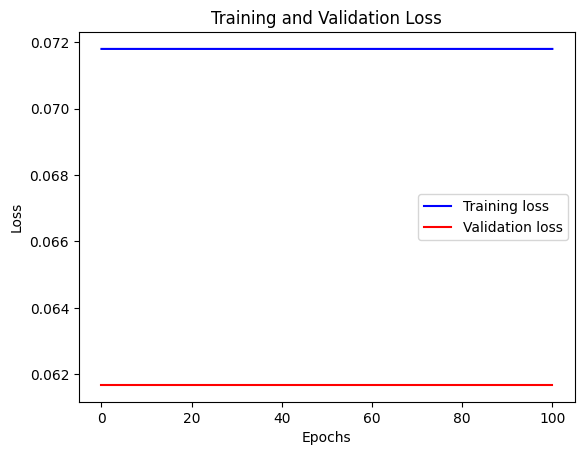

: 

In [75]:
def train_model(feedback_model, x_train, y_train, X_test, y_test, epochs=100):
    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=100,
        restore_best_weights=True
    )

    # Train the model
    history = feedback_model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Save the trained model weights
    feedback_model.save_weights('model_weights.h5')

    # Visualize the loss
    visualize_loss(history, "Training and Validation Loss")
    return history

# Load values
ITERATIONS_COUNT = 1000
history = train_model(model, X_train, Y_train, X_test, Y_test, epochs=ITERATIONS_COUNT)



In [6]:
'''Predict next sequence based on input sequence
'''
# predict all
predictions = model.predict(X)

# print predictions for len-1
with open("predictions.txt", "w") as f:
    for i in range(len(Y)):
        p, x, y, db_in = predictions[i], X[i], Y[i], DB[i]

        if i + 1 < len(DB):
            db_next = DB[i+1]

            # Write to file
            f.write(f"#{i} {db_in} -> {db_next}\n")
            for idx__ in range(len(y)):
                if not (p[idx__]<0.01 and y[idx__] < 0.01):
                    f.write("(%d)%f %f \n"%(idx__, p[idx__],y[idx__]))


# stats
loss, accuracy = model.evaluate(X, Y)
#print(f"loss={loss:4.4f} accuracy={100*accuracy:4.4f}%")

# predict for most recent Y
indices = [-1]
predictions = model.predict([Y[i] for i in indices])
for i in indices:
    p =  predictions[i]

    log(f"# Predicted for {convert_inputs_to_numbers(Y[i])}")
    for idx__ in range(len(y)):
        if p[idx__] > 0.01:
            log(f"({idx__}){ p[idx__]:4.4f}\n")

1/1 [==============================] - 0s 37ms/step
21:01:09.849979 ## # Predicted for [6, 13, 15, 20, 40]
21:01:09.849979 ## (2)0.0635

21:01:09.849979 ## (12)0.6482

21:01:09.849979 ## (32)0.3682

21:01:09.849979 ## (33)0.3783

21:01:09.849979 ## (43)0.7726

21:01:09.849979 ## (44)0.7897

